In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import model_selection, svm, naive_bayes
from sklearn.preprocessing import LabelEncoder

#Loading data from local storage
df = pd.read_csv(('data/text.csv'), index_col=False).sample(frac=1)
df.head(5)

#Splitting data into train and test data
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['sentence'],df['label'],test_size=0.3)

#Encoding the labels Decision, Action and Risk as 0, 1 and 2 numeric values respectively. 
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
print(Train_Y[0:5])

#The Tfidf_vectorizer converts the dataset of sentences into vectorized inputs.
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['sentence'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
print(Tfidf_vect.vocabulary_)

[0 2 0 0 1]
{'hans': 90, 'schmitt': 178, 'has': 91, 'to': 209, 'be': 17, 'reminded': 173, 'mitigate': 133, 'the': 203, 'risk': 175, 'of': 147, 'factory': 73, 'blackout': 20, 'by': 25, 'taking': 199, 'backup': 16, 'generator': 84, 'after': 7, 'monday': 135, 'next': 145, 'week': 218, 'ilan': 99, 'guenay': 88, 'took': 210, 'decision': 51, 'formalize': 82, 'our': 152, 'partnership': 156, 'with': 223, 'mont': 136, 'blanc': 21, 'sports': 187, 'if': 98, 'google': 86, 'do': 57, 'not': 146, 'secure': 179, 'content': 40, 'writer': 227, 'spot': 188, 'during': 62, 'event': 71, 'due': 61, 'lack': 114, 'commitment': 34, 'from': 83, 'board': 22, 'then': 204, 'might': 130, 'need': 143, 'pay': 158, 'customers': 45, 'matthieu': 125, 'le': 116, 'bon': 23, 'release': 172, 'new': 144, 'product': 168, 'line': 118, 'one': 150, 'month': 137, 'earlier': 63, 'they': 206, 'cannot': 28, 'deliver': 53, 'videos': 214, 'within': 224, 'his': 97, 'flu': 78, 'fill': 75, 'position': 162, 'for': 79, 'another': 12, 'year'

In [2]:
#model_name is the classification model that is selected
def model(model_name,Train_X_Tfidf,Test_X_Tfidf,Train_Y):
    
    model_name.fit(Train_X_Tfidf,Train_Y)
    predictions= model_name.predict(Test_X_Tfidf)
    return predictions;

In [3]:
def evaluation(predictions,Test_Y):
    
    #To plot the confusion matrix
    evaluation_matrix = confusion_matrix(Test_Y, predictions)
    
    df_plot = pd.DataFrame(evaluation_matrix, index=['Action','Decision','Risk'], columns=['Action','Decision','Risk'])
    sns.heatmap(df_plot, annot=True)
    
    # Using accuracy_score function to get the accuracy
    print("Accuracy Score -> ",accuracy_score(predictions, Test_Y)*100)
    
    #Classification report for F1_score and precision
    print(classification_report(predictions, Test_Y))
    
    return;

Accuracy Score ->  95.08196721311475
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.84      1.00      0.91        16
           2       1.00      1.00      1.00        29

    accuracy                           0.95        61
   macro avg       0.95      0.94      0.94        61
weighted avg       0.96      0.95      0.95        61



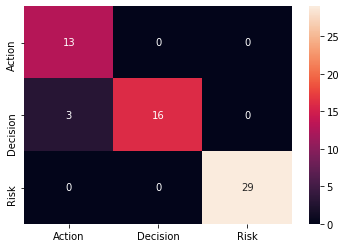

In [4]:
SVM_Classifier = svm.SVC(C=1.0, kernel='linear') #C is Regularization parameter that is multipled by sqaured L2 penalty and the result added to the cost function. Used default value here.

#first parameter of the model function (model_name) is the classifier to be selected
model_predictions = model(SVM_Classifier,Train_X_Tfidf,Test_X_Tfidf,Train_Y)
evaluation(model_predictions,Test_Y)

Accuracy Score ->  98.36065573770492
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        29

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



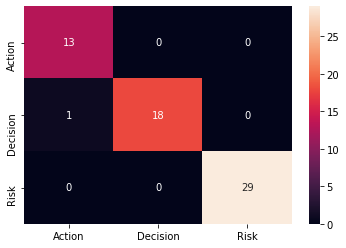

In [5]:
SGD_Classifier = SGDClassifier()
model_predictions = model(SGD_Classifier,Train_X_Tfidf,Test_X_Tfidf,Train_Y)
evaluation(model_predictions,Test_Y)

Accuracy Score ->  88.52459016393442
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        20
           1       0.63      1.00      0.77        12
           2       1.00      1.00      1.00        29

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.85        61
weighted avg       0.93      0.89      0.89        61



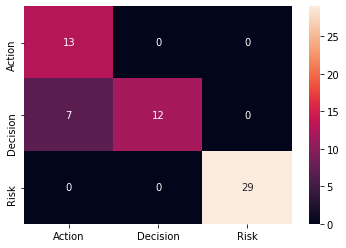

In [6]:
NB_Gaussian_Classifier = naive_bayes.MultinomialNB()
model_predictions = model(NB_Gaussian_Classifier,Train_X_Tfidf,Test_X_Tfidf,Train_Y)
evaluation(model_predictions,Test_Y)

From the comparisons between Support Vector Machines, Stochastic Gradient Descent and MultinomialNB naive_bayes, it was observed that though Naïve Bayes is a great machine learning model for text data, SGD and LSVM have better accuracy for our dataset. It can be concluded that the Stochastic Gradient Descent is the best fit for our dataset as it has better F1 score and lower false predictions compared to Support Vector Machines.